## Problem Set 3: Neural Networks

### Overview
In this problem set, you'll explore the foundational concepts of neural networks, covering basic architecture, activation functions, forward propagation, regularization, and adaptive learning. You'll also complete coding exercises to implement neural network components and train a basic neural network. You will both complete this Python script (`ps3.ipynb`) and submit a LaTeX report (`ps3.tex` and `ps3.pdf`).

## 1. Basic Architecture of a Neural Network

A neural network is composed of layers of neurons: input layer, hidden layer(s), and an output layer. Each neuron receives inputs, processes them, and passes the result to the next layer.

In this section, you'll implement a basic 3-layer neural network structure.

In [110]:
import numpy as np

# Initialize weights and biases for a 3-layer neural network
def initialize_parameters(input_size, hidden_size1, hidden_size2, output_size):
    """
    Initialize weights and biases for a 3-layer neural network.
    """
    np.random.seed(0)  # Seed for reproducibility
    
    W1 = np.random.randn(hidden_size1, input_size) * 0.01
    b1 = np.zeros((hidden_size1, 1))
    W2 = np.random.randn(hidden_size2, hidden_size1) * 0.01
    b2 = np.zeros((hidden_size2, 1))
    W3 = np.random.randn(output_size, hidden_size2) * 0.01
    b3 = np.zeros((output_size, 1))
    
    return W1, b1, W2, b2, W3, b3

# Example usage
input_size = 3
hidden_size1 = 4
hidden_size2 = 4
output_size = 1

W1, b1, W2, b2, W3, b3 = initialize_parameters(input_size, hidden_size1, hidden_size2, output_size)
print("Weights and biases initialized!")

Weights and biases initialized!


## 2. Activation Functions


Activation functions introduce non-linearity into the network, allowing it to learn more complex patterns. Common functions include:

- **Sigmoid**: S-shaped curve, useful for binary classifications.
- **ReLU (Rectified Linear Unit)**: Outputs zero if input is negative, otherwise outputs the input.
- **Leaky ReLU**: Similar to ReLU but with a small gradient for negative inputs.

### Exercise:
Write functions for each activation function and plot them over a range of inputs.


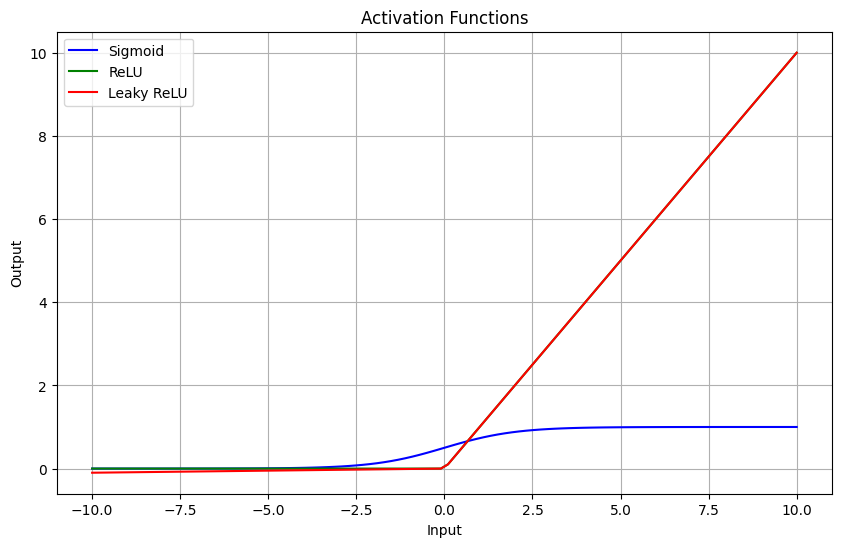

In [111]:
import matplotlib.pyplot as plt

# Define common activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    return np.where(x > 0, x, alpha * x)

# Plot activation functions
x_vals = np.linspace(-10, 10, 100)
plt.figure(figsize=(10, 6))

plt.plot(x_vals, sigmoid(x_vals), label="Sigmoid", color="blue")
plt.plot(x_vals, relu(x_vals), label="ReLU", color="green")
plt.plot(x_vals, leaky_relu(x_vals), label="Leaky ReLU", color="red")

plt.title("Activation Functions")
plt.xlabel("Input")
plt.ylabel("Output")
plt.legend()
plt.grid()
plt.show()


## 3. Forward Propagation

Forward propagation is the process of passing inputs through the network to generate an output.

### Exercise:
Implement forward propagation for a 3-layer neural network.

In [112]:
# Forward propagation through a 3-layer neural network
def forward_propagation(X, W1, b1, W2, b2, W3, b3):
    """
    Perform forward propagation through the network.
    """
    Z1 = np.dot(W1, X) + b1  # Layer 1 input
    A1 = relu(Z1)            # Layer 1 activation
    Z2 = np.dot(W2, A1) + b2 # Layer 2 input
    A2 = relu(Z2)            # Layer 2 activation
    Z3 = np.dot(W3, A2) + b3 # Layer 3 (output) input
    A3 = sigmoid(Z3)         # Output activation (sigmoid)
    
    return Z1, A1, Z2, A2, Z3, A3

# Example usage
X = np.random.randn(input_size, 5)  # Example input data (5 samples)
Z1, A1, Z2, A2, Z3, A3 = forward_propagation(X, W1, b1, W2, b2, W3, b3)
print("Forward propagation complete!")


Forward propagation complete!


## 4. Overfitting and Regularization

Overfitting occurs when a model learns the noise in the training data rather than the actual pattern. Regularization helps control this.

Common techniques include:

- **L2 Regularization**: Adds a penalty based on the sum of squared weights.
- **Dropout**: Randomly ignores some neurons during training.

### Exercise:
Implement L2 regularization in the loss calculation.

In [113]:
# Compute loss with L2 regularization
def compute_loss_with_l2(Y, Y_hat, W1, W2, W3, lambd=0.1):
    """
    Compute the mean squared error loss with L2 regularization.
    """
    m = Y.shape[1]  # Number of training examples
    mse_loss = np.mean((Y - Y_hat) ** 2)  # Mean squared error
    l2_penalty = (lambd / (2 * m)) * (np.sum(W1**2) + np.sum(W2**2) + np.sum(W3**2))  # L2 regularization
    total_loss = mse_loss + l2_penalty
    
    return total_loss

# Example usage
Y = np.random.randn(output_size, 5)        # Target outputs
Y_hat = A3  # Use output from forward propagation

loss = compute_loss_with_l2(Y, Y_hat, W1, W2, W3)
print(f"Loss with L2 regularization: {loss:.6f}")


Loss with L2 regularization: 1.402778


## 5. Training a Neural Network

Training involves adjusting the weights and biases to minimize the loss. A popular method is gradient descent.

### Exercise:
Implement a simple gradient descent loop to train the neural network.

In [114]:
# Define gradient descent function
def gradient_descent(weights, biases, grad_weights, grad_biases, learning_rate):
    """
    Perform gradient descent updates for weights and biases.
    """
    weights = weights - learning_rate * grad_weights
    biases = biases - learning_rate * grad_biases
    return weights, biases

# Training loop
learning_rate = 0.01
lambd = 0.1  # L2 regularization parameter

for iteration in range(10):  # Perform 10 iterations
    # Forward propagation
    Z1, A1, Z2, A2, Z3, predictions = forward_propagation(X, W1, b1, W2, b2, W3, b3)

    # Compute the loss with L2 regularization
    loss = compute_loss_with_l2(Y, predictions, W1, W2, W3, lambd)
    print(f"Iteration {iteration + 1}, Loss: {loss:.6f}")
    
    # Backpropagation (example placeholder gradients)
    grad_W1 = np.random.randn(*W1.shape)
    grad_b1 = np.random.randn(*b1.shape)
    grad_W2 = np.random.randn(*W2.shape)
    grad_b2 = np.random.randn(*b2.shape)
    grad_W3 = np.random.randn(*W3.shape)
    grad_b3 = np.random.randn(*b3.shape)
    
    # Update weights and biases using gradient descent
    W1, b1 = gradient_descent(W1, b1, grad_W1, grad_b1, learning_rate)
    W2, b2 = gradient_descent(W2, b2, grad_W2, grad_b2, learning_rate)
    W3, b3 = gradient_descent(W3, b3, grad_W3, grad_b3, learning_rate)


Iteration 1, Loss: 1.402778
Iteration 2, Loss: 1.401954
Iteration 3, Loss: 1.401859
Iteration 4, Loss: 1.406069
Iteration 5, Loss: 1.407795
Iteration 6, Loss: 1.410831
Iteration 7, Loss: 1.408489
Iteration 8, Loss: 1.411256
Iteration 9, Loss: 1.407700
Iteration 10, Loss: 1.403944


## 6. Adaptive Learning Rates


Adaptive learning rate methods, like Adam, adjust the learning rate based on past gradients, improving training stability.

### Exercise:
Implement a simple version of the Adam optimizer for gradient descent.

In [115]:
# Define Adam optimizer
def adam_optimizer_step(weights, grad_weights, moment1, moment2, iteration, learning_rate, beta1=0.9, beta2=0.999, epsilon=1e-8):
    """
    Perform a single Adam optimizer update step.
    """
    moment1 = beta1 * moment1 + (1 - beta1) * grad_weights
    moment2 = beta2 * moment2 + (1 - beta2) * (grad_weights ** 2)

    # Bias correction
    m1_corrected = moment1 / (1 - beta1 ** iteration)
    m2_corrected = moment2 / (1 - beta2 ** iteration)

    # Update weights
    weights -= learning_rate * m1_corrected / (np.sqrt(m2_corrected) + epsilon)
    return weights, moment1, moment2

# Initialize Adam moments
m_W1, v_W1 = np.zeros_like(W1), np.zeros_like(W1)
m_W2, v_W2 = np.zeros_like(W2), np.zeros_like(W2)
m_W3, v_W3 = np.zeros_like(W3), np.zeros_like(W3)

# Training loop with Adam
for t in range(1, 11):  # Perform 10 iterations
    # Forward propagation
    Z1, A1, Z2, A2, Z3, predictions = forward_propagation(X, W1, b1, W2, b2, W3, b3)

    # Compute gradients (placeholders)
    grad_W1 = np.random.randn(*W1.shape)
    grad_W2 = np.random.randn(*W2.shape)
    grad_W3 = np.random.randn(*W3.shape)

    # Update weights using Adam optimizer
    W1, m_W1, v_W1 = adam_optimizer_step(W1, grad_W1, m_W1, v_W1, t, learning_rate)
    W2, m_W2, v_W2 = adam_optimizer_step(W2, grad_W2, m_W2, v_W2, t, learning_rate)
    W3, m_W3, v_W3 = adam_optimizer_step(W3, grad_W3, m_W3, v_W3, t, learning_rate)
